### Anova

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Sales_data_zone_wise.csv")
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [2]:
d=df.describe()
d.round()

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.0,29.0,29.0,29.0
mean,1540493.0,1755560.0,1772871.0,1842927.0
std,261940.0,168390.0,333194.0,375016.0
min,1128185.0,1527574.0,1237722.0,1234311.0
25%,1305972.0,1606010.0,1523308.0,1520406.0
50%,1534390.0,1740365.0,1767047.0,1854412.0
75%,1820196.0,1875658.0,2098463.0,2180416.0
max,2004480.0,2091194.0,2290580.0,2364132.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


### ● The mean sales generated by each zone.

In [4]:
sales_mean=df.mean()
sales_mean.round()

/var/folders/fw/436p2dfn0xd6rjpw2r2qw9mw0000gn/T/ipykernel_1073/339549600.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales_mean=df.mean()


Zone - A    1540493.0
Zone - B    1755560.0
Zone - C    1772871.0
Zone - D    1842927.0
dtype: float64

### ● Total sales generated by all the zones for each month.

In [5]:
df['TotalSale']=df['Zone - A']+df['Zone - B']+df['Zone - C']+df['Zone - D']
df[['Month','TotalSale']]

,Month,TotalSale
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


### ● Check whether all the zones generate the same amount of sales.

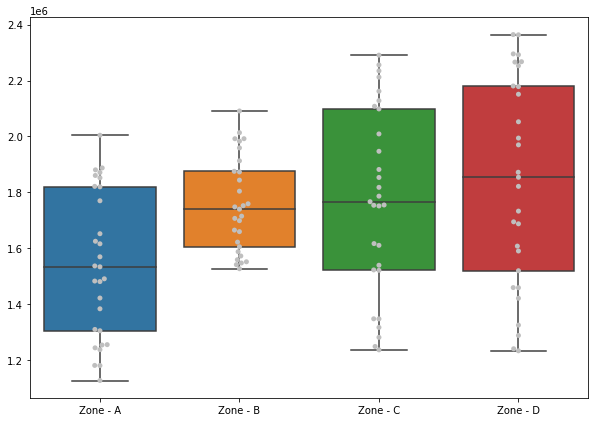

In [6]:
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(data=df[['Zone - A','Zone - B','Zone - C','Zone - D']])
ax = sns.swarmplot(data=df[['Zone - A','Zone - B','Zone - C','Zone - D']], color=".75")

In [7]:
# A one-way ANOVA uses the following null and alternative hypotheses:

# H0 (null hypothesis): μ1 = μ2 = μ3 = μ4 (all the zone means are equal)
# H1 (alternate hypothesis): at least one mean  is different from the rest

In [8]:
scipy.stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

In [9]:
f_statistics,pvalue=scipy.stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
f_statistics

5.672056106843581

In [10]:
#find F critical value
scipy.stats.f.ppf(q=1-.05, dfn=3, dfd=25)

2.991240909549952

In [11]:
print("p-value for 5% significance is: ", pvalue)
if pvalue<0.05:
    print("Since pvalue is less than 0.05,Reject null hypothesis and conclude that the zones  have different mean  sales.")
else:
    print("Since pvalue  is greater than 0.05,Accept null hypothesis and conclude that zones  have equal mean sales")

p-value for 5% significance is:  0.0011827601694503335
Since pvalue is less than 0.05,Reject null hypothesis and conclude that the zones  have different mean  sales.


#### Interference: All the zones generate the different amount of sales


<Figure size 1440x1224 with 0 Axes>

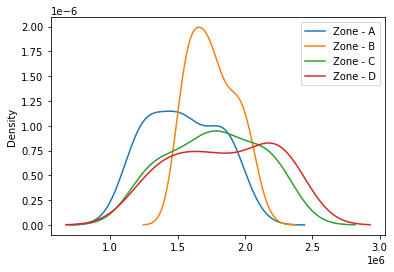

In [12]:
fig = plt.figure(figsize=(20,17))
data=df[['Zone - A','Zone - B','Zone - C','Zone - D']].plot.kde()